In [4]:
# !pip install kagglehub

### Library Importation

In [89]:
import pandas as pd 
import warnings 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns




warnings.filterwarnings('ignore')

### Loading Dataset.. 

In [90]:
data = pd.read_excel('Global_Dataset.xlsx')
data

,ID,CVE-ID,CVSS-V3,CVSS-V2,SEVERITY,DESCRIPTION,CWE-ID
0,1,CVE-1999-0001,None,5,MEDIUM,ip_input.c in BSD-derived TCP/IP implementatio...,CWE-20
1,2,CVE-1999-0002,None,10,HIGH,Buffer overflow in NFS mountd gives root acces...,CWE-119
2,3,CVE-1999-0003,None,10,HIGH,Execute commands as root via buffer overflow i...,NVD-CWE-Other
3,4,CVE-1999-0004,None,5,MEDIUM,"MIME buffer overflow in email clients, e.g. So...",NVD-CWE-Other
4,5,CVE-1999-0005,None,10,HIGH,Arbitrary command execution via IMAP buffer ov...,NVD-CWE-Other
...,...,...,...,...,...,...,...
169561,169562,CVE-2021-45470,7.5,5,HIGH,lib/DatabaseLayer.py in cve-search before 4.1....,NVD-CWE-Other
169562,169563,CVE-2021-45471,5.3,5,MEDIUM,"In MediaWiki through 1.37, blocked IP addresse...",NVD-CWE-noinfo
169563,169564,CVE-2021-45472,6.1,4.3,MEDIUM,"In MediaWiki through 1.37, XSS can occur in Wi...",CWE-79
169564,169565,CVE-2021-45473,6.1,4.3,MEDIUM,"In MediaWiki through 1.37, Wikibase item descr...",CWE-79


### Data Exploration.. 

In [91]:
data.DESCRIPTION

0         ip_input.c in BSD-derived TCP/IP implementatio...
1         Buffer overflow in NFS mountd gives root acces...
2         Execute commands as root via buffer overflow i...
3         MIME buffer overflow in email clients, e.g. So...
4         Arbitrary command execution via IMAP buffer ov...
                                ...                        
169561    lib/DatabaseLayer.py in cve-search before 4.1....
169562    In MediaWiki through 1.37, blocked IP addresse...
169563    In MediaWiki through 1.37, XSS can occur in Wi...
169564    In MediaWiki through 1.37, Wikibase item descr...
169565    In MediaWiki through 1.37, the Special:ImportF...
Name: DESCRIPTION, Length: 169566, dtype: object

In [92]:
data.DESCRIPTION[0]

'ip_input.c in BSD-derived TCP/IP implementations allows remote attackers to cause a denial of service (crash or hang) via crafted packets.'

In [93]:
data['CVE-ID'].unique()

array(['CVE-1999-0001', 'CVE-1999-0002', 'CVE-1999-0003', ...,
       'CVE-2021-45472', 'CVE-2021-45473', 'CVE-2021-45474'], dtype=object)

In [132]:
for col in data.columns: 
    un = data[col].unique()
    print(f'=================  [       {col}    ]  ===================')
    print(un)

=================  [       ID    ]  ===================
[     1      2      3 ... 169564 169565 169566]
=================  [       CVE-ID    ]  ===================
['CVE-1999-0001' 'CVE-1999-0002' 'CVE-1999-0003' ... 'CVE-2021-45472'
 'CVE-2021-45473' 'CVE-2021-45474']
=================  [       CVSS-V3    ]  ===================
['None' 9.8 7.5 7.8 4.8 7.1 5.6 6.1 5.5 8.1 5.9 6.8 9.1 6.5 8.8 4.2 5.3
 4.3 7 3.1 3.3 7.2 7.3 6.7 4.1 5.8 8 3.7 7.4 4.7 5.4 6.3 10 8.2 2.4 6 8.6
 9.6 6.2 6.4 4.9 5 2.7 9.9 5.7 4.4 4.6 8.4 6.6 9.3 7.6 3.4 4 2.6 3.5 5.1
 8.5 2.5 6.9 8.3 7.7 2.8 2 9 2.3 8.7 7.9 2.9 4.5 5.2 9.4 1.9 2.1 3.8 3 1.8
 2.2 3.9 8.9 3.6 3.2]
=================  [       CVSS-V2    ]  ===================
[5 10 7.5 7.2 4.6 2.6 5.1 7.1 6.4 1.9 2.1 3.7 7.6 6.2 6.8 7.8 9.3 1.2 0
 4.9 4 3.6 4.3 9 3.5 3.3 5.4 1.7 6.9 6.5 5.8 3.8 8.5 8.3 6.6 9.4 8.8 4.4 6
 5.2 4.8 6.3 4.7 1 5.5 5.6 6.1 5.7 1.5 3.2 9.7 2.3 4.1 2.4 2.7 2.9 7.9 7.3
 3.4 7.4 1.8 'None' 3 5.9 8 7.7 8.2 1.3 2.8 5.3 6.7 8.7 7 1.4]
=======

In [7]:
# pd.read_csv(path)

<Axes: >

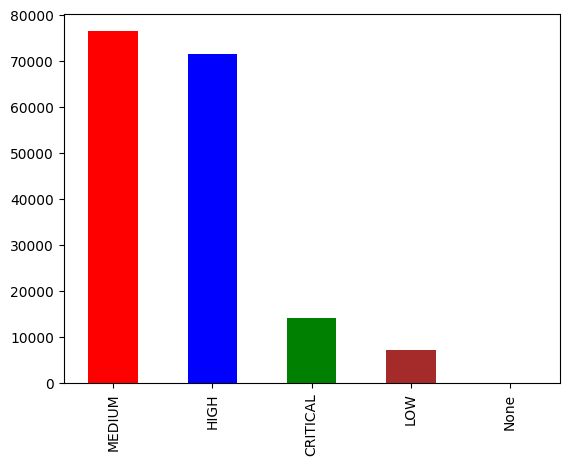

In [133]:
data.SEVERITY.value_counts().plot(kind='bar', color=['r', 'b', 'g', 'brown'])

In [128]:
data["CVSS-V3"].unique()

array(['None', 9.8, 7.5, 7.8, 4.8, 7.1, 5.6, 6.1, 5.5, 8.1, 5.9, 6.8, 9.1,
       6.5, 8.8, 4.2, 5.3, 4.3, 7, 3.1, 3.3, 7.2, 7.3, 6.7, 4.1, 5.8, 8,
       3.7, 7.4, 4.7, 5.4, 6.3, 10, 8.2, 2.4, 6, 8.6, 9.6, 6.2, 6.4, 4.9,
       5, 2.7, 9.9, 5.7, 4.4, 4.6, 8.4, 6.6, 9.3, 7.6, 3.4, 4, 2.6, 3.5,
       5.1, 8.5, 2.5, 6.9, 8.3, 7.7, 2.8, 2, 9, 2.3, 8.7, 7.9, 2.9, 4.5,
       5.2, 9.4, 1.9, 2.1, 3.8, 3, 1.8, 2.2, 3.9, 8.9, 3.6, 3.2],
      dtype=object)

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169566 entries, 0 to 169565
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           169566 non-null  int64 
 1   CVE-ID       169566 non-null  object
 2   CVSS-V3      169566 non-null  object
 3   CVSS-V2      169566 non-null  object
 4   SEVERITY     169566 non-null  object
 5   DESCRIPTION  169566 non-null  object
 6   CWE-ID       169566 non-null  object
dtypes: int64(1), object(6)
memory usage: 9.1+ MB


In [135]:
data.DESCRIPTION[2]

'Execute commands as root via buffer overflow in Tooltalk database server (rpc.ttdbserverd).'

In [136]:
data.head()

,ID,CVE-ID,CVSS-V3,CVSS-V2,SEVERITY,DESCRIPTION,CWE-ID
0,1,CVE-1999-0001,None,5,MEDIUM,ip_input.c in BSD-derived TCP/IP implementatio...,CWE-20
1,2,CVE-1999-0002,None,10,HIGH,Buffer overflow in NFS mountd gives root acces...,CWE-119
2,3,CVE-1999-0003,None,10,HIGH,Execute commands as root via buffer overflow i...,NVD-CWE-Other
3,4,CVE-1999-0004,None,5,MEDIUM,"MIME buffer overflow in email clients, e.g. So...",NVD-CWE-Other
4,5,CVE-1999-0005,None,10,HIGH,Arbitrary command execution via IMAP buffer ov...,NVD-CWE-Other


In [137]:
for col in data.columns: 
    val = 'None' in data[col].values
    print(f'col {col} :   is None : {val}')

col ID :   is None : False
col CVE-ID :   is None : False
col CVSS-V3 :   is None : True
col CVSS-V2 :   is None : True
col SEVERITY :   is None : True
col DESCRIPTION :   is None : False
col CWE-ID :   is None : False


In [138]:
data[data['CVSS-V3'] == 'None'].shape

(74007, 7)

In [139]:
data[data['CVSS-V2'] == 'None'].shape

(105, 7)

In [140]:
data[data['SEVERITY'] == 'None'].shape

(86, 7)

In [141]:
data.shape

(169566, 7)

In [142]:
data = data[data['CVSS-V3'] != 'None']

data.head()

,ID,CVE-ID,CVSS-V3,CVSS-V2,SEVERITY,DESCRIPTION,CWE-ID
195,196,CVE-1999-0199,9.8,7.5,CRITICAL,manual/search.texi in the GNU C Library (aka g...,CWE-252
232,233,CVE-1999-0236,7.5,5,HIGH,ScriptAlias directory in NCSA and Apache httpd...,CWE-200
1799,1800,CVE-2000-0258,7.5,5,HIGH,IIS 4.0 and 5.0 allows remote attackers to cau...,CWE-20
2779,2780,CVE-2000-1254,7.5,5,HIGH,crypto/rsa/rsa_gen.c in OpenSSL before 0.9.6 m...,CWE-310
6238,6239,CVE-2002-20001,7.5,5,HIGH,The Diffie-Hellman Key Agreement Protocol allo...,CWE-400


### Data Cleaning

In [143]:
data  = data[data['CVSS-V2'] != 'None']
data  = data[data['SEVERITY'] != 'None']

In [145]:
reduced_df = data
reduced_df.head(3)

,ID,CVE-ID,CVSS-V3,CVSS-V2,SEVERITY,DESCRIPTION,CWE-ID
195,196,CVE-1999-0199,9.8,7.5,CRITICAL,manual/search.texi in the GNU C Library (aka g...,CWE-252
232,233,CVE-1999-0236,7.5,5,HIGH,ScriptAlias directory in NCSA and Apache httpd...,CWE-200
1799,1800,CVE-2000-0258,7.5,5,HIGH,IIS 4.0 and 5.0 allows remote attackers to cau...,CWE-20


In [146]:
for col in reduced_df.columns: 
    val = 'None' in reduced_df[col].values
    print(f'col {col} :   is None : {val}')

col ID :   is None : False
col CVE-ID :   is None : False
col CVSS-V3 :   is None : False
col CVSS-V2 :   is None : False
col SEVERITY :   is None : False
col DESCRIPTION :   is None : False
col CWE-ID :   is None : False


In [22]:
# need data balancing....

<Axes: >

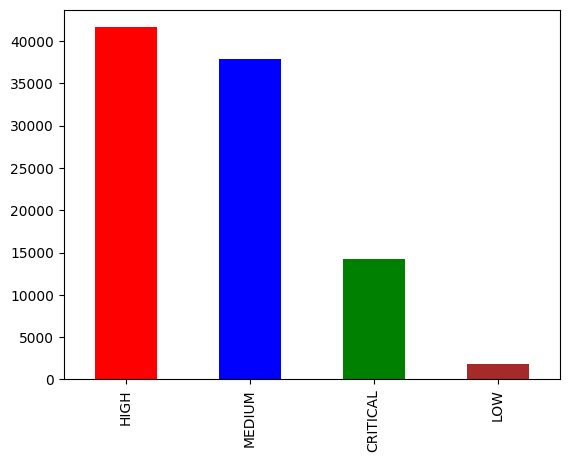

In [147]:
reduced_df.SEVERITY.value_counts().plot(kind='bar', color=['r', 'b', 'g', 'brown'])

In [148]:
# extraction feature from desription...
reduced_df.DESCRIPTION

195       manual/search.texi in the GNU C Library (aka g...
232       ScriptAlias directory in NCSA and Apache httpd...
1799      IIS 4.0 and 5.0 allows remote attackers to cau...
2779      crypto/rsa/rsa_gen.c in OpenSSL before 0.9.6 m...
6238      The Diffie-Hellman Key Agreement Protocol allo...
                                ...                        
169561    lib/DatabaseLayer.py in cve-search before 4.1....
169562    In MediaWiki through 1.37, blocked IP addresse...
169563    In MediaWiki through 1.37, XSS can occur in Wi...
169564    In MediaWiki through 1.37, Wikibase item descr...
169565    In MediaWiki through 1.37, the Special:ImportF...
Name: DESCRIPTION, Length: 95540, dtype: object

In [149]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [150]:
st = stopwords.words('english')
print(st)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [151]:
reduced_df


,ID,CVE-ID,CVSS-V3,CVSS-V2,SEVERITY,DESCRIPTION,CWE-ID
195,196,CVE-1999-0199,9.8,7.5,CRITICAL,manual/search.texi in the GNU C Library (aka g...,CWE-252
232,233,CVE-1999-0236,7.5,5,HIGH,ScriptAlias directory in NCSA and Apache httpd...,CWE-200
1799,1800,CVE-2000-0258,7.5,5,HIGH,IIS 4.0 and 5.0 allows remote attackers to cau...,CWE-20
2779,2780,CVE-2000-1254,7.5,5,HIGH,crypto/rsa/rsa_gen.c in OpenSSL before 0.9.6 m...,CWE-310
6238,6239,CVE-2002-20001,7.5,5,HIGH,The Diffie-Hellman Key Agreement Protocol allo...,CWE-400
...,...,...,...,...,...,...,...
169561,169562,CVE-2021-45470,7.5,5,HIGH,lib/DatabaseLayer.py in cve-search before 4.1....,NVD-CWE-Other
169562,169563,CVE-2021-45471,5.3,5,MEDIUM,"In MediaWiki through 1.37, blocked IP addresse...",NVD-CWE-noinfo
169563,169564,CVE-2021-45472,6.1,4.3,MEDIUM,"In MediaWiki through 1.37, XSS can occur in Wi...",CWE-79
169564,169565,CVE-2021-45473,6.1,4.3,MEDIUM,"In MediaWiki through 1.37, Wikibase item descr...",CWE-79


In [152]:
def get_dec_lenght(data): 
    return len(data.split(' '))

reduced_df['dec_leng'] = reduced_df['DESCRIPTION'].apply(lambda x:get_dec_lenght(x))
reduced_df.head(3)

,ID,CVE-ID,CVSS-V3,CVSS-V2,SEVERITY,DESCRIPTION,CWE-ID,dec_leng
195,196,CVE-1999-0199,9.8,7.5,CRITICAL,manual/search.texi in the GNU C Library (aka g...,CWE-252,47
232,233,CVE-1999-0236,7.5,5,HIGH,ScriptAlias directory in NCSA and Apache httpd...,CWE-200,13
1799,1800,CVE-2000-0258,7.5,5,HIGH,IIS 4.0 and 5.0 allows remote attackers to cau...,CWE-20,30


In [153]:
reduced_df.dec_leng.sum()

4224583

In [ ]:
###

In [156]:
# data cleaning 
sample = reduced_df['DESCRIPTION'][:5]

In [157]:
sample = list(sample.values)
sample

["manual/search.texi in the GNU C Library (aka glibc) before 2.2 lacks a statement about the unspecified tdelete return value upon deletion of a tree's root, which might allow attackers to access a dangling pointer in an application whose developer was unaware of a documentation update from 1999.",
 'ScriptAlias directory in NCSA and Apache httpd allowed attackers to read CGI programs.',
 'IIS 4.0 and 5.0 allows remote attackers to cause a denial of service by sending many URLs with a large number of escaped characters, aka the "Myriad Escaped Characters" Vulnerability.',
 'crypto/rsa/rsa_gen.c in OpenSSL before 0.9.6 mishandles C bitwise-shift operations that exceed the size of an expression, which makes it easier for remote attackers to defeat cryptographic protection mechanisms by leveraging improper RSA key generation on 64-bit HP-UX platforms.',
 'The Diffie-Hellman Key Agreement Protocol allows remote attackers (from the client side) to send arbitrary numbers that are actually no

In [158]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [159]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

pt  = PorterStemmer()
st  = stopwords.words('english')

In [160]:
def clean_text(data): 
    # removing punctuation mark
    doc = ''.join([d.replace('/', ' ').replace('-', ' ') for d in data])
    doc = ''.join([d for d in doc if d not in string.punctuation])
    # removing stopwords
    # doc = ' '.join([pt.stem(d) for d in doc.split(' ') if d not in st])    
    return doc

print(clean_text(sample[2]))

IIS 40 and 50 allows remote attackers to cause a denial of service by sending many URLs with a large number of escaped characters aka the Myriad Escaped Characters Vulnerability


In [161]:
# apply on main document
reduced_df['clean_desc'] = reduced_df['DESCRIPTION'].apply(lambda x: clean_text(x))
reduced_df.head()

,ID,CVE-ID,CVSS-V3,CVSS-V2,SEVERITY,DESCRIPTION,CWE-ID,dec_leng,clean_desc
195,196,CVE-1999-0199,9.8,7.5,CRITICAL,manual/search.texi in the GNU C Library (aka g...,CWE-252,47,manual searchtexi in the GNU C Library aka gli...
232,233,CVE-1999-0236,7.5,5,HIGH,ScriptAlias directory in NCSA and Apache httpd...,CWE-200,13,ScriptAlias directory in NCSA and Apache httpd...
1799,1800,CVE-2000-0258,7.5,5,HIGH,IIS 4.0 and 5.0 allows remote attackers to cau...,CWE-20,30,IIS 40 and 50 allows remote attackers to cause...
2779,2780,CVE-2000-1254,7.5,5,HIGH,crypto/rsa/rsa_gen.c in OpenSSL before 0.9.6 m...,CWE-310,38,crypto rsa rsagenc in OpenSSL before 096 misha...
6238,6239,CVE-2002-20001,7.5,5,HIGH,The Diffie-Hellman Key Agreement Protocol allo...,CWE-400,91,The Diffie Hellman Key Agreement Protocol allo...


In [163]:
def get_dec_lenght(data): 
    return len(data.split(' '))

reduced_df['dec_leng'] = reduced_df['clean_desc'].apply(lambda x:get_dec_lenght(x))
reduced_df.head(3)

,ID,CVE-ID,CVSS-V3,CVSS-V2,SEVERITY,DESCRIPTION,CWE-ID,dec_leng,clean_desc
195,196,CVE-1999-0199,9.8,7.5,CRITICAL,manual/search.texi in the GNU C Library (aka g...,CWE-252,48,manual searchtexi in the GNU C Library aka gli...
232,233,CVE-1999-0236,7.5,5,HIGH,ScriptAlias directory in NCSA and Apache httpd...,CWE-200,13,ScriptAlias directory in NCSA and Apache httpd...
1799,1800,CVE-2000-0258,7.5,5,HIGH,IIS 4.0 and 5.0 allows remote attackers to cau...,CWE-20,30,IIS 40 and 50 allows remote attackers to cause...


In [171]:
reduced_df.dec_leng.mean()

46.640810131881935

In [165]:
# dropping unused columns 
reduced_df = reduced_df.drop(columns=['ID', 'DESCRIPTION'])
reduced_df.head(3)

,CVE-ID,CVSS-V3,CVSS-V2,SEVERITY,CWE-ID,dec_leng,clean_desc
195,CVE-1999-0199,9.8,7.5,CRITICAL,CWE-252,48,manual searchtexi in the GNU C Library aka gli...
232,CVE-1999-0236,7.5,5,HIGH,CWE-200,13,ScriptAlias directory in NCSA and Apache httpd...
1799,CVE-2000-0258,7.5,5,HIGH,CWE-20,30,IIS 40 and 50 allows remote attackers to cause...


In [167]:
reduced_df.shape

(95540, 7)

In [168]:
# feature extraction with tensorflow 
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [169]:
tokenizer = Tokenizer(num_words=1000000, oov_token="<OOV>")  # OOV for out-of-vocabulary words

In [170]:
tokenizer.fit_on_texts(reduced_df.clean_desc)

In [172]:
# word_index = tokenizer.word_index
# print("Word Index:", word_index)
sequences = tokenizer.texts_to_sequences(reduced_df.clean_desc)
print("Sequences:", sequences[:100])

Sequences: [[2775, 50164, 4, 2, 919, 790, 310, 92, 3148, 11, 989, 1178, 5, 1863, 658, 2, 131, 50165, 996, 240, 1241, 760, 6, 5, 9375, 226, 50, 434, 38, 32, 3, 29, 5, 6730, 277, 4, 8, 78, 3617, 1455, 37, 22617, 6, 5, 2513, 174, 47, 26896], [50166, 193, 4, 50167, 7, 422, 2504, 264, 32, 3, 79, 1103, 1748], [5332, 1033, 7, 734, 14, 16, 32, 3, 44, 5, 48, 6, 33, 23, 249, 1365, 962, 20, 5, 592, 485, 6, 2358, 802, 92, 2, 50168, 2358, 802, 9], [2031, 1068, 50169, 4, 1423, 11, 7497, 628, 790, 16289, 4681, 387, 27, 6447, 2, 495, 6, 8, 1116, 50, 715, 77, 968, 19, 16, 32, 3, 3839, 1071, 367, 1693, 23, 517, 167, 1068, 337, 929, 28, 1347, 1097, 1749, 9759, 1264], [2, 7498, 7499, 337, 13056, 376, 14, 16, 32, 47, 2, 228, 523, 3, 327, 30, 1983, 27, 41, 2870, 45, 785, 648, 7, 258, 13965, 35, 523, 10602, 3455, 13057, 3992, 92, 5, 50170, 139, 2, 228, 1081, 1554, 4320, 690, 526, 7, 97, 7920, 2, 139, 65, 46, 521, 26897, 4, 1197, 272, 5, 228, 25, 344, 5, 35, 3, 2596, 347, 22618, 159, 337, 495, 2, 1497, 139, 2

In [66]:
padded_sequences = pad_sequences(sequences, padding='post', maxlen=40)  # Use 'pre' for pre-padding
print("Padded Sequences:", padded_sequences)

Padded Sequences: [[ 3148    11   989 ...   174    47 26896]
 [50166   193     4 ...     0     0     0]
 [ 5332  1033     7 ...     0     0     0]
 ...
 [    4  1799    62 ...     0     0     0]
 [    4  1799    62 ...     0     0     0]
 [    4  1799    62 ...     0     0     0]]


In [173]:
padded_sequences.shape

(95540, 40)

In [203]:
f_list = [f"f{i}" for i in range(1, padded_sequences.shape[1] + 1)]
generated_feature_df = pd.DataFrame(padded_sequences, columns=f_list)
generated_feature_df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40
0,3148,11,989,1178,5,1863,658,2,131,50165,...,3617,1455,37,22617,6,5,2513,174,47,26896
1,50166,193,4,50167,7,422,2504,264,32,3,...,0,0,0,0,0,0,0,0,0,0
2,5332,1033,7,734,14,16,32,3,44,5,...,0,0,0,0,0,0,0,0,0,0
3,4,1423,11,7497,628,790,16289,4681,387,27,...,167,1068,337,929,28,1347,1097,1749,9759,1264
4,272,5,228,25,344,5,35,3,2596,347,...,10602,7,2,35,304,46,423,3,38,10602


In [231]:
reduced_df.to_csv('rdf.csv', index=False)
generated_feature_df.to_csv('gfdf.csv', index=False)
print('confirmed')

confirmed


In [4]:
# 
df1 = pd.read_csv('rdf.csv')
df2 = pd.read_csv('gfdf.csv')

print(df1.shape)
print(df2.shape)

(95540, 7)
(95540, 40)


In [5]:
merged_df = pd.concat([df1, df2], axis=1)
merged_df.shape

(95540, 47)

In [6]:
merged_df.head(3)

,CVE-ID,CVSS-V3,CVSS-V2,SEVERITY,CWE-ID,dec_leng,clean_desc,f1,f2,f3,...,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40
0,CVE-1999-0199,9.8,7.5,CRITICAL,CWE-252,48,manual searchtexi in the GNU C Library aka gli...,3148,11,989,...,3617,1455,37,22617,6,5,2513,174,47,26896
1,CVE-1999-0236,7.5,5.0,HIGH,CWE-200,13,ScriptAlias directory in NCSA and Apache httpd...,50166,193,4,...,0,0,0,0,0,0,0,0,0,0
2,CVE-2000-0258,7.5,5.0,HIGH,CWE-20,30,IIS 40 and 50 allows remote attackers to cause...,5332,1033,7,...,0,0,0,0,0,0,0,0,0,0


In [7]:
final_df = merged_df
final_df.shape

(95540, 47)

In [8]:
final_df.tail(2)

,CVE-ID,CVSS-V3,CVSS-V2,SEVERITY,CWE-ID,dec_leng,clean_desc,f1,f2,f3,...,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40
95538,CVE-2021-45473,6.1,4.3,MEDIUM,CWE-79,24,In MediaWiki through 137 Wikibase item descrip...,4,1799,62,...,0,0,0,0,0,0,0,0,0,0
95539,CVE-2021-45474,6.1,4.3,MEDIUM,CWE-79,17,In MediaWiki through 137 the SpecialImportFile...,4,1799,62,...,0,0,0,0,0,0,0,0,0,0


In [9]:
final_df.SEVERITY.unique()

array(['CRITICAL', 'HIGH', 'MEDIUM', 'LOW'], dtype=object)

In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95540 entries, 0 to 95539
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CVE-ID      95540 non-null  object 
 1   CVSS-V3     95540 non-null  float64
 2   CVSS-V2     95540 non-null  float64
 3   SEVERITY    95540 non-null  object 
 4   CWE-ID      95540 non-null  object 
 5   dec_leng    95540 non-null  int64  
 6   clean_desc  95540 non-null  object 
 7   f1          95540 non-null  int64  
 8   f2          95540 non-null  int64  
 9   f3          95540 non-null  int64  
 10  f4          95540 non-null  int64  
 11  f5          95540 non-null  int64  
 12  f6          95540 non-null  int64  
 13  f7          95540 non-null  int64  
 14  f8          95540 non-null  int64  
 15  f9          95540 non-null  int64  
 16  f10         95540 non-null  int64  
 17  f11         95540 non-null  int64  
 18  f12         95540 non-null  int64  
 19  f13         95540 non-nul

In [11]:
# preprocessing... 

In [12]:
for col in final_df.columns: 
    if final_df[col].dtype == 'object':
        # convert to categories
        final_df[col] = final_df[col].astype('category')
        final_df[col] = final_df[col].cat.codes
        print('True')

final_df.info()

True
True
True
True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95540 entries, 0 to 95539
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CVE-ID      95540 non-null  int32  
 1   CVSS-V3     95540 non-null  float64
 2   CVSS-V2     95540 non-null  float64
 3   SEVERITY    95540 non-null  int8   
 4   CWE-ID      95540 non-null  int16  
 5   dec_leng    95540 non-null  int64  
 6   clean_desc  95540 non-null  int32  
 7   f1          95540 non-null  int64  
 8   f2          95540 non-null  int64  
 9   f3          95540 non-null  int64  
 10  f4          95540 non-null  int64  
 11  f5          95540 non-null  int64  
 12  f6          95540 non-null  int64  
 13  f7          95540 non-null  int64  
 14  f8          95540 non-null  int64  
 15  f9          95540 non-null  int64  
 16  f10         95540 non-null  int64  
 17  f11         95540 non-null  int64  
 18  f12         95540 non-null  int64  
 19  f13  

In [13]:
final_df.head(3)

,CVE-ID,CVSS-V3,CVSS-V2,SEVERITY,CWE-ID,dec_leng,clean_desc,f1,f2,f3,...,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40
0,0,9.8,7.5,0,67,48,86625,3148,11,989,...,3617,1455,37,22617,6,5,2513,174,47,26896
1,1,7.5,5.0,1,50,13,61430,50166,193,4,...,0,0,0,0,0,0,0,0,0,0
2,2,7.5,5.0,1,49,30,39411,5332,1033,7,...,0,0,0,0,0,0,0,0,0,0


In [14]:
final_df.SEVERITY.unique()

array([0, 1, 3, 2], dtype=int8)

In [15]:
# data balacing

<Axes: >

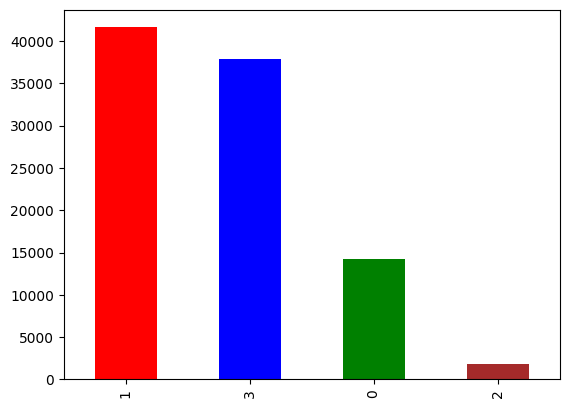

In [16]:
final_df.SEVERITY.value_counts().plot(kind='bar', color=['r', 'b', 'g', 'brown'])

In [17]:
final_df.SEVERITY.unique()

array([0, 1, 3, 2], dtype=int8)

In [19]:
final_df.head(3)

,CVE-ID,CVSS-V3,CVSS-V2,SEVERITY,CWE-ID,dec_leng,clean_desc,f1,f2,f3,...,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40
0,0,9.8,7.5,0,67,48,86625,3148,11,989,...,3617,1455,37,22617,6,5,2513,174,47,26896
1,1,7.5,5.0,1,50,13,61430,50166,193,4,...,0,0,0,0,0,0,0,0,0,0
2,2,7.5,5.0,1,49,30,39411,5332,1033,7,...,0,0,0,0,0,0,0,0,0,0


In [20]:
final_df.drop(columns=['dec_leng', 'clean_desc', 'clean_desc'], inplace=True)

In [21]:
final_df.sample(3)

,CVE-ID,CVSS-V3,CVSS-V2,SEVERITY,CWE-ID,f1,f2,f3,f4,f5,...,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40
79650,77321,5.5,2.1,3,220,167,1648,4,2,762,...,29,0,0,0,0,0,0,0,0,0
93767,91136,5.4,3.5,3,263,4116,708,428,56,516,...,0,0,0,0,0,0,0,0,0,0
39212,38368,6.1,4.3,3,263,7973,329,11,207,1316,...,0,0,0,0,0,0,0,0,0,0


In [34]:
X, y = final_df.drop(columns=['SEVERITY']), final_df.SEVERITY
X.sample(5)

,CVE-ID,CVSS-V3,CVSS-V2,CWE-ID,f1,f2,f3,f4,f5,f6,...,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40
58544,57085,9.8,10.0,160,234,271,7,242,18,2289,...,30,26,57,0,0,0,0,0,0,0
59276,57812,9.8,7.5,160,234,271,7,242,18,2042,...,70,173,21,93,3,30,26,57,0,0
55378,54000,4.4,3.6,305,901,147,42,43,316,43,...,175,257,894,213,530,269,278,557,443,8
93034,90435,5.5,4.3,16,6272,10,99,3,184,121,...,0,0,0,0,0,0,0,0,0,0
31111,30428,6.5,4.0,50,8,31,37,75,4,4544,...,0,0,0,0,0,0,0,0,0,0


In [35]:
print(y.shape)
y.sample(6)

(95540,)


93190    0
38231    0
65765    3
58261    1
19989    3
21972    0
Name: SEVERITY, dtype: int8

In [36]:
# data balanced sample 

In [37]:
from imblearn.combine import SMOTEENN

In [38]:
senn =  SMOTEENN()
resample_X , resample_y = senn.fit_resample(X, y)
resample_y

0        0
1        0
2        0
3        0
4        0
        ..
89126    3
89127    3
89128    3
89129    3
89130    3
Name: SEVERITY, Length: 89131, dtype: int8

In [39]:
import matplotlib.pyplot as plt

<Axes: >

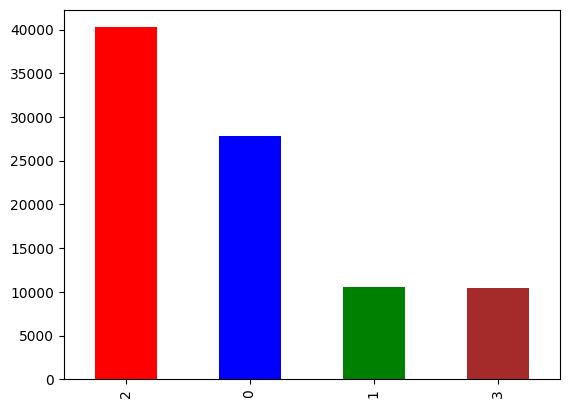

In [40]:
resample_y.value_counts().plot(kind='bar', color=['r', 'b', 'g', 'brown'])

In [289]:
# min max scaled data 

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
min_max  = MinMaxScaler()
scalled_x = min_max.fit_transform(resample_X)
scalled_x

array([[0.00000000e+00, 9.75609756e-01, 7.15909091e-01, ...,
        1.50224041e-03, 4.09525386e-04, 2.32058118e-01],
       [1.29211487e-04, 9.75609756e-01, 7.15909091e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.15352478e-04, 9.75609756e-01, 7.15909091e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.83824875e-01, 5.73170732e-01, 3.52272727e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.03775129e-01, 5.24390244e-01, 3.52272727e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.97494374e-01, 5.00000000e-01, 3.52272727e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [292]:
# machine leanring model training...

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

# Train Gradient Boosting (XGBoost)
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Evaluate
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4246
           1       1.00      1.00      1.00     12425
           2       1.00      0.99      0.99       565
           3       1.00      1.00      1.00     11426

    accuracy                           1.00     28662
   macro avg       1.00      1.00      1.00     28662
weighted avg       1.00      1.00      1.00     28662



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4246
           1       1.00      1.00      1.00     12425
           2       1.00      1.00      1.00       565
           3       1.00      1.00      1.00     11426

    accuracy                           1.00     28662
   macro avg       1.00      1.00      1.00     28662
weighted avg       1.00      1.00      1.00     28662



In [65]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(resample_X , resample_y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train2, y_train2)

# Evaluate
y_pred2 = rf.predict(X_test2)
print(classification_report(y_test2, y_pred2))


# Train Gradient Boosting (XGBoost)
xgb = XGBClassifier()
xgb.fit(X_train2, y_train2)

# Evaluate
y_pred3 = xgb.predict(X_test2)
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5553
           1       1.00      1.00      1.00      2154
           2       1.00      1.00      1.00      8061
           3       1.00      1.00      1.00      2059

    accuracy                           1.00     17827
   macro avg       1.00      1.00      1.00     17827
weighted avg       1.00      1.00      1.00     17827



In [67]:
# Train Gradient Boosting (XGBoost)
xgb = XGBClassifier()
xgb.fit(X_train2, y_train2)

# Evaluate
y_pred3 = xgb.predict(X_test2)
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5553
           1       1.00      1.00      1.00      2154
           2       1.00      1.00      1.00      8061
           3       1.00      1.00      1.00      2059

    accuracy                           1.00     17827
   macro avg       1.00      1.00      1.00     17827
weighted avg       1.00      1.00      1.00     17827



In [73]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(scalled_x , resample_y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train3, y_train3)

# Evaluate
y_pred3 = rf.predict(X_test3)
print(classification_report(y_test3, y_pred3))

# Train Gradient Boosting (XGBoost)
xgb = XGBClassifier()
xgb.fit(X_train3, y_train3)

# Evaluate
y_pred3 = xgb.predict(X_test3)
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5553
           1       1.00      1.00      1.00      2154
           2       1.00      1.00      1.00      8061
           3       1.00      1.00      1.00      2059

    accuracy                           1.00     17827
   macro avg       1.00      1.00      1.00     17827
weighted avg       1.00      1.00      1.00     17827



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5553
           1       1.00      1.00      1.00      2154
           2       1.00      1.00      1.00      8061
           3       1.00      1.00      1.00      2059

    accuracy                           1.00     17827
   macro avg       1.00      1.00      1.00     17827
weighted avg       1.00      1.00      1.00     17827



In [ ]:
# scalled_x , resample_y

In [78]:
# Dimention reduction 

In [80]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic dataset
from sklearn.datasets import make_classification



# Apply PCA
pca = PCA(n_components=10)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(scalled_x)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Total Explained Variance: {np.sum(explained_variance):.2f}")

Explained Variance Ratio: [0.29571406 0.18936578 0.10787199 0.0548567  0.02270885 0.01733625
 0.01498137 0.01447677 0.01418666 0.01334817]
Total Explained Variance: 0.74


In [81]:
X_pca

array([[ 0.57710965,  0.49440925, -0.19354306, ..., -0.04145421,
        -0.12625793, -0.09889351],
       [ 0.58175805, -0.20265635, -0.58571474, ...,  0.18273377,
        -0.02469814,  0.05467142],
       [ 0.58952353, -0.2017011 , -0.59818205, ..., -0.04267606,
         0.07280889,  0.00525887],
       ...,
       [ 0.01894497, -0.10040641, -0.42523842, ..., -0.1425071 ,
        -0.00279572, -0.11310751],
       [-0.0465251 , -0.22893276, -0.24323587, ..., -0.00352331,
         0.07686896,  0.09879036],
       [-0.10762984, -0.36244331, -0.00153526, ..., -0.07379576,
        -0.00255623, -0.05275476]])

In [85]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_pca , resample_y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_, y_train_)

# Evaluate
y_pred_ = rf.predict(X_test_)
print(classification_report(y_test_, y_pred_))

# Train Gradient Boosting (XGBoost)
xgb = XGBClassifier()
xgb.fit(X_train_, y_train_)

# Evaluate
y_pred = xgb.predict(X_test_)
print(classification_report(y_test_, y_pred_))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5553
           1       0.99      0.97      0.98      2154
           2       1.00      1.00      1.00      8061
           3       0.99      0.98      0.99      2059

    accuracy                           0.99     17827
   macro avg       0.99      0.99      0.99     17827
weighted avg       0.99      0.99      0.99     17827

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5553
           1       0.99      0.97      0.98      2154
           2       1.00      1.00      1.00      8061
           3       0.99      0.98      0.99      2059

    accuracy                           0.99     17827
   macro avg       0.99      0.99      0.99     17827
weighted avg       0.99      0.99      0.99     17827



In [86]:
# Apply PCA
pca = PCA(n_components=7)  # Reduce to 2 dimensions for visualization
X_pca2 = pca.fit_transform(scalled_x)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Total Explained Variance: {np.sum(explained_variance):.2f}")

Explained Variance Ratio: [0.29571406 0.18936578 0.10787199 0.0548567  0.02270834 0.01740721
 0.01497919]
Total Explained Variance: 0.70


In [87]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_pca2 , resample_y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_, y_train_)

# Evaluate
y_pred_ = rf.predict(X_test_)
print(classification_report(y_test_, y_pred_))

# Train Gradient Boosting (XGBoost)
xgb = XGBClassifier()
xgb.fit(X_train_, y_train_)

# Evaluate
y_pred = xgb.predict(X_test_)
print(classification_report(y_test_, y_pred_))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5553
           1       0.98      0.96      0.97      2154
           2       1.00      1.00      1.00      8061
           3       0.99      0.98      0.98      2059

    accuracy                           0.99     17827
   macro avg       0.99      0.98      0.99     17827
weighted avg       0.99      0.99      0.99     17827

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5553
           1       0.98      0.96      0.97      2154
           2       1.00      1.00      1.00      8061
           3       0.99      0.98      0.98      2059

    accuracy                           0.99     17827
   macro avg       0.99      0.98      0.99     17827
weighted avg       0.99      0.99      0.99     17827



([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Random Forest'),
  Text(1, 0, 'XGB Algorithm'),
  Text(2, 0, 'Random Forest + SMOTE-ENN'),
  Text(3, 0, 'XGB Algorithm + SMOTE-ENN'),
  Text(4, 0, 'Random Forest + SMOTE-ENN + MinMaxScaling'),
  Text(5, 0, 'XGB Algorithm + SMOTE-ENN + MinMaxScaling'),
  Text(6, 0, 'Random Forest + SMOTE-ENN + MinMaxScaling + PCA'),
  Text(7, 0, 'XGB Algorithm + SMOTE-ENN + MinMaxScaling + PCA')])

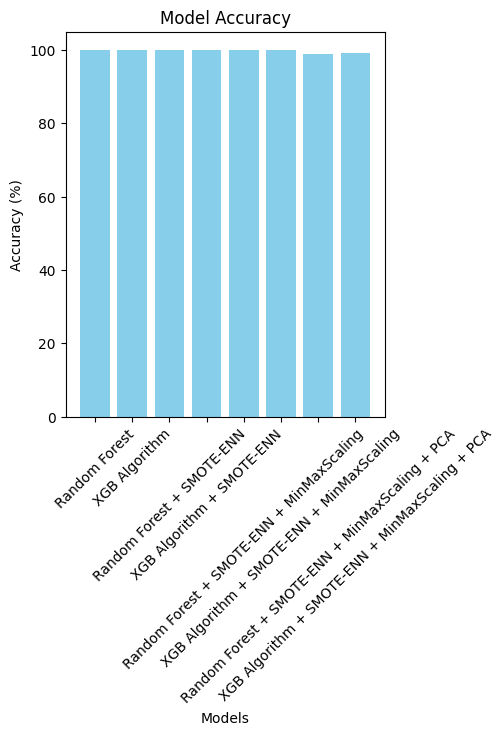

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the results table
models = ['Random Forest', 'XGB Algorithm', 'Random Forest + SMOTE-ENN', 
          'XGB Algorithm + SMOTE-ENN', 'Random Forest + SMOTE-ENN + MinMaxScaling', 
          'XGB Algorithm + SMOTE-ENN + MinMaxScaling', 
          'Random Forest + SMOTE-ENN + MinMaxScaling + PCA', 
          'XGB Algorithm + SMOTE-ENN + MinMaxScaling + PCA']

accuracy = [100, 100, 100, 100, 100, 100, 98.92, 99.21]
precision = [100, 100, 100, 100, 100, 100, 99.15, 98.87]
recall = [100, 100, 100, 100, 100, 100, 98.78, 99.34]
f1_score = [100, 100, 100, 100, 100, 100, 98.96, 99.10]

# Bar Chart
plt.figure(figsize=(14,5))
plt.subplot(1, 3, 1)
plt.bar(models, accuracy, color='skyblue')
plt.title('Model Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)


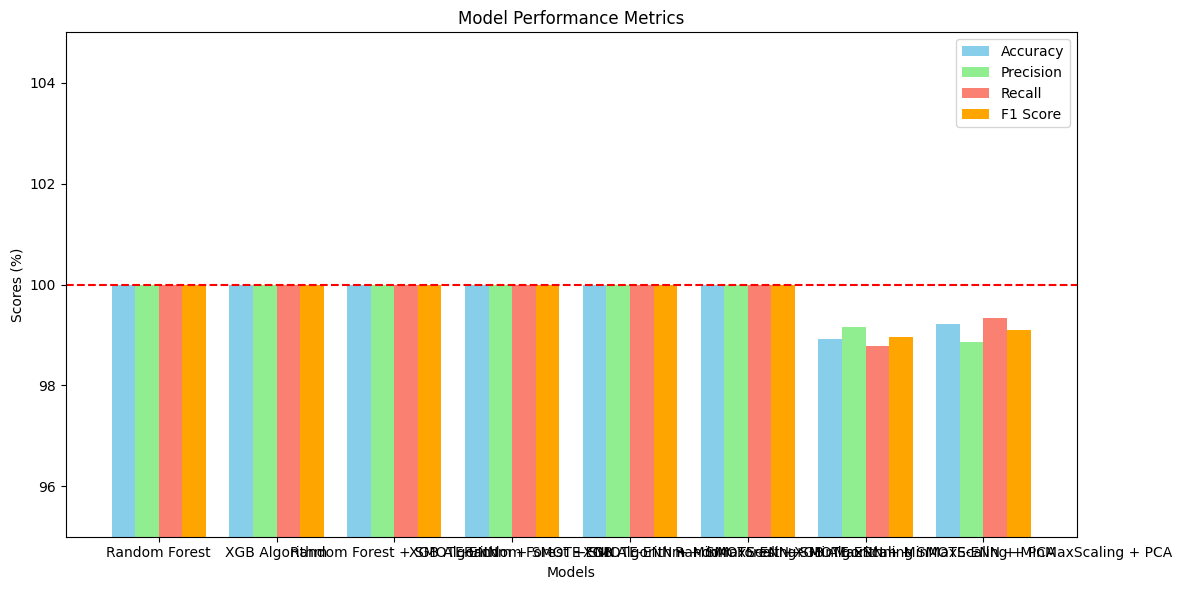

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the results table
models = ['Random Forest', 'XGB Algorithm', 
          'Random Forest + SMOTE-ENN', 'XGB Algorithm + SMOTE-ENN', 
          'Random Forest + SMOTE-ENN + MinMaxScaling', 
          'XGB Algorithm + SMOTE-ENN + MinMaxScaling', 
          'Random Forest + SMOTE-ENN + MinMaxScaling + PCA', 
          'XGB Algorithm + SMOTE-ENN + MinMaxScaling + PCA']

# Metrics for each model
accuracy = [100, 100, 100, 100, 100, 100, 98.92, 99.21]
precision = [100, 100, 100, 100, 100, 100, 99.15, 98.87]
recall = [100, 100, 100, 100, 100, 100, 98.78, 99.34]
f1_score = [100, 100, 100, 100, 100, 100, 98.96, 99.10]

# Set up the bar chart
bar_width = 0.2
index = np.arange(len(models))

plt.figure(figsize=(12,6))

# Plot each metric
plt.bar(index - bar_width*1.5, accuracy, bar_width, label='Accuracy', color='skyblue')
plt.bar(index - bar_width/2, precision, bar_width, label='Precision', color='lightgreen')
plt.bar(index + bar_width/2, recall, bar_width, label='Recall', color='salmon')
plt.bar(index + bar_width*1.5, f1_score, bar_width, label='F1 Score', color='orange')

# Customize the chart
plt.title('Model Performance Metrics')
plt.xlabel('Models')
plt.ylabel('Scores (%)')
plt.xticks(index, models)
plt.ylim(95, 105) # Set y-axis limits to focus on the relevant range
plt.axhline(100, color='red', linestyle='--') # Add a line at y=100 for reference
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

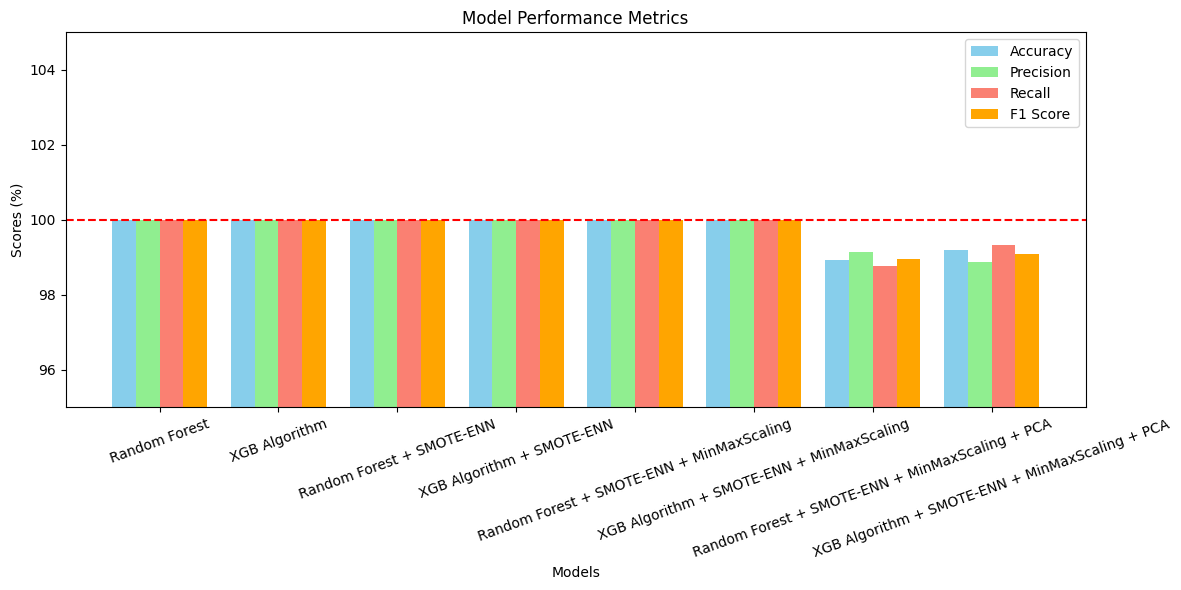

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the results table
models = ['Random Forest', 'XGB Algorithm', 
          'Random Forest + SMOTE-ENN', 'XGB Algorithm + SMOTE-ENN', 
          'Random Forest + SMOTE-ENN + MinMaxScaling', 
          'XGB Algorithm + SMOTE-ENN + MinMaxScaling', 
          'Random Forest + SMOTE-ENN + MinMaxScaling + PCA', 
          'XGB Algorithm + SMOTE-ENN + MinMaxScaling + PCA']

# Metrics for each model
accuracy = [100, 100, 100, 100, 100, 100, 98.92, 99.21]
precision = [100, 100, 100, 100, 100, 100, 99.15, 98.87]
recall = [100, 100, 100, 100, 100, 100, 98.78, 99.34]
f1_score = [100, 100, 100, 100, 100, 100, 98.96, 99.10]

# Set up the bar chart
bar_width = 0.2
index = np.arange(len(models))

plt.figure(figsize=(12,6))

# Plot each metric
plt.bar(index - bar_width*1.5, accuracy, bar_width, label='Accuracy', color='skyblue')
plt.bar(index - bar_width/2, precision, bar_width, label='Precision', color='lightgreen')
plt.bar(index + bar_width/2, recall, bar_width, label='Recall', color='salmon')
plt.bar(index + bar_width*1.5, f1_score, bar_width, label='F1 Score', color='orange')

# Customize the chart
plt.title('Model Performance Metrics')
plt.xlabel('Models')
plt.ylabel('Scores (%)')
plt.xticks(index, models, rotation=20) # Set labels vertical
plt.ylim(95, 105) # Set y-axis limits to focus on the relevant range
plt.axhline(100, color='red', linestyle='--') # Add a line at y=100 for reference
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'line'

<Figure size 1200x600 with 0 Axes>